In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [19]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [10]:

# Calculate the date one year from the last date in data set.

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print("Date one year ago is: ", year_ago)


# Design a query to retrieve the last 12 months of precipitation data and plot the results.
m_prcp = session.query(Measurement.prcp , Measurement.date).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()
m_prcp

# Starting from the most recent data point in the database.


# Perform a query to retrieve the data and precipitation scores





Date one year ago is:  2016-08-23


[(0.0, '2016-08-23'),
 (3.8, '2016-08-23'),
 (1.3, '2016-08-23'),
 (None, '2016-08-23'),
 (0.5, '2016-08-23'),
 (45.5, '2016-08-23'),
 (17.8, '2016-08-23'),
 (2.0, '2016-08-24'),
 (54.6, '2016-08-24'),
 (57.9, '2016-08-24'),
 (None, '2016-08-24'),
 (31.0, '2016-08-24'),
 (54.6, '2016-08-24'),
 (36.8, '2016-08-24'),
 (2.0, '2016-08-25'),
 (2.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (5.3, '2016-08-25'),
 (1.5, '2016-08-25'),
 (2.8, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.8, '2016-08-26'),
 (0.5, '2016-08-26'),
 (1.0, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.3, '2016-08-26'),
 (0.0, '2016-08-27'),
 (4.6, '2016-08-27'),
 (0.5, '2016-08-27'),
 (0.0, '2016-08-27'),
 (3.0, '2016-08-27'),
 (None, '2016-08-27'),
 (0.3, '2016-08-28'),
 (3.6, '2016-08-28'),
 (3.6, '2016-08-28'),
 (3.6, '2016-08-28'),
 (15.2, '2016-08-28'),
 (52.6, '2016-08-28'),
 (0.0, '2016-08-29'),
 (4.3, '2016-08-29'),
 (1.0, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),
 (8.9, '2016-08-29'

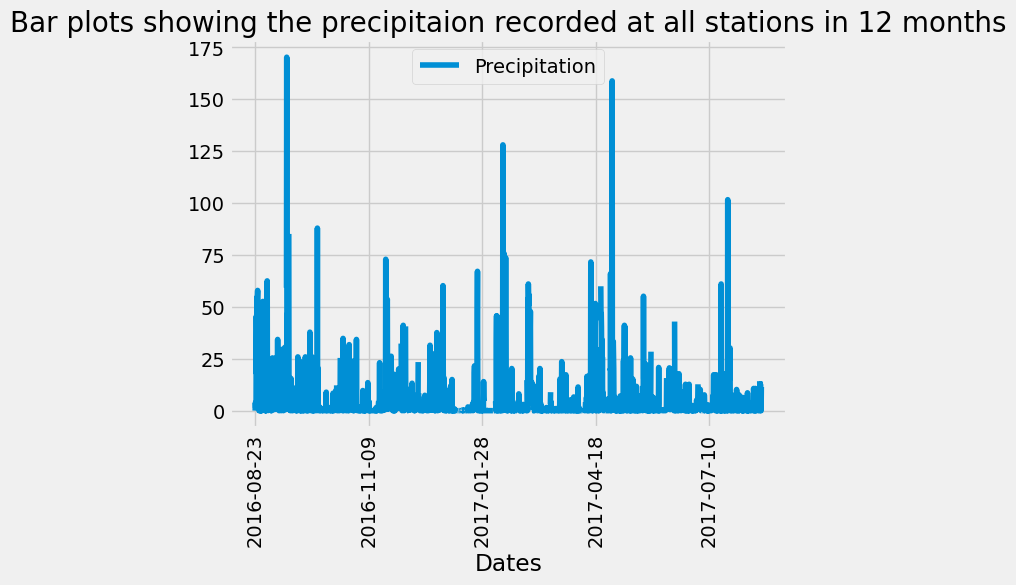

In [11]:

# Save the query results as a Pandas DataFrame. Explicitly set the column names

# Sort the dataframe by date

df = pd.DataFrame(m_prcp, columns = ['Precipitation', 'Dates'])
df.set_index('Dates')

df_dates = df.sort_values(by = 'Dates')


# Use Pandas Plotting with Matplotlib to plot the data
df_dates.plot(x = 'Dates' , grid = True,)
plt.xticks(rotation=90)

plt.title("Bar plots showing the precipitaion recorded at all stations in 12 months" , size = 20)
plt.show()


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_dates.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).all()
station_count

[(9,)]

In [31]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order


active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature = session.query(func.min(Measurement.tobs),
    func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
   filter(Measurement.station == 'USC00519281').all()
temperature


[(12.2, 29.4, 22.035822510822513)]

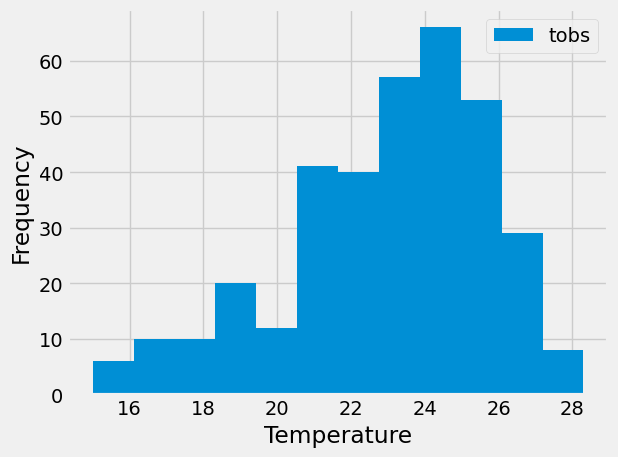

In [52]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature_observation = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= year_ago).all()
temp_df=pd.DataFrame(temperature_observation)
temp_df.plot(kind='hist', bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Close Session

In [53]:
# Close Session
session.close()
